<div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
본 자료는 저작권법 제25조 2항에 의해 보호를 받습니다. 본 자료를 외부에 공개하지 말아주세요.<br>
본 강의만 잘 정리하면, 데이터 분석과 데이터 과학(머신러닝, 인공지능) 모두 가능합니다!<br>
<b><a href="https://school.fun-coding.org/">잔재미코딩</a> 에서 본 강의 기반 최적화된 로드맵도 확인하실 수 있습니다</b></div>

### pandas 라이브러리와 탐색적 데이터 분석 과정 익히기

> 다양한 데이터 분석 케이스를 통해 데이터 분석과 pandas 라이브러리 활용에 대해 익히보기로 합니다.

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 1. 데이터의 출처와 주제에 대해 이해</font><br>

### 전체 판매 프로세스
1. 해당 쇼핑몰에 중소업체가 계약을 맺고
2. 중소업체가 해당 쇼핑몰에 직접 상품을 올리고
2. 고객이 구매하면, 중소업체가 Olist가 제공하는 물류 파트너를 활용해서 배송을 하고,
3. 고객이 상품을 받으면, 고객에게 이메일 survey 가 전송되고,
4. 고객이 이메일 survey 에 별점과 커멘트를 남겨서 제출하게 됨
    
### 데이터 출처
- 브라질에서 가장 큰 백화점의 이커머스 쇼핑몰 (https://olist.com/)
  - 2016년도부터 2018년도 9월까지의 100k 개의 구매 데이터 정보
  - 구매 상태, 가격, 지불수단, 물류 관련, 리뷰관련, 상품 정보, 구매자 지역 관련 정보

### 주요 질문(탐색하고자 하는 질문 리스트)
- **얼마나 많은 고객이 있는가?** 
- **고객은 어디에 주로 사는가?** 
- **고객은 주로 어떤 지불방법을 사용하는가?**
- 평균 거래액은 얼마일까?
- 일별, 주별, 월별 판매 트렌드는?
- 어떤 카테고리가 가장 많은 상품이 팔렸을까?
</div>

### 1. 얼마나 많은 고객이 있는가?

In [3]:
import pandas as pd
PATH = "00_data/"

In [4]:
products = pd.read_csv(PATH + "olist_products_dataset.csv", encoding='utf-8-sig')
customers = pd.read_csv(PATH + "olist_customers_dataset.csv", encoding='utf-8-sig')
geolocation = pd.read_csv(PATH + "olist_geolocation_dataset.csv", encoding='utf-8-sig')
order_items = pd.read_csv(PATH + "olist_order_items_dataset.csv", encoding='utf-8-sig')
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
reviews = pd.read_csv(PATH + "olist_order_reviews_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
sellers = pd.read_csv(PATH + "olist_sellers_dataset.csv", encoding='utf-8-sig')
category_name = pd.read_csv(PATH + "product_category_name_translation.csv", encoding='utf-8-sig')

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- value_counts(): 각각의 값이 전체 Series 에서 각각 몇 개가 있는지를 알려줌

In [7]:
customers['customer_unique_id'].value_counts().max()

17

In [8]:
customers['customer_id'].value_counts().max()

1

- nunique(): unique 한 값의 갯수를 알려줌

In [9]:
customers['customer_id'].nunique()

99441

In [10]:
customers['customer_unique_id'].nunique()

96096

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">고객 분석1: 실제 고객 수는 99441 로 볼 수 있음</font><br>
</div>

### 2. 고객은 어디에 주로 사는가?

In [11]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers_location = customers.groupby('customer_city').count().sort_values(by='customer_id', ascending=False)
customers_location.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
campinas,1444,1444,1444,1444
porto alegre,1379,1379,1379,1379
salvador,1245,1245,1245,1245
guarulhos,1189,1189,1189,1189


In [13]:
customers_location = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)

In [14]:
customers_location.head(20)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
Name: customer_id, dtype: int64

In [15]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

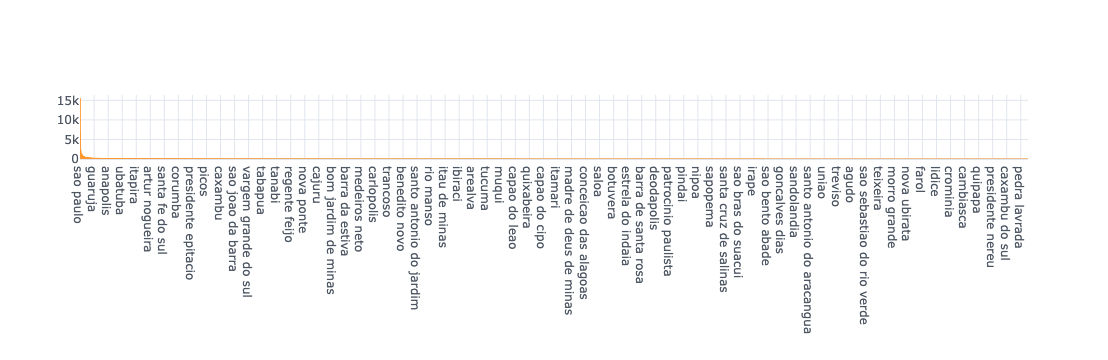

In [16]:
customers_location.iplot(kind='bar', theme='white')

In [15]:
customers_location_top20 = customers_location.head(20)

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">고객 분석2: 고객이 주로 사는 지역 TOP 20</font><br>
</div>

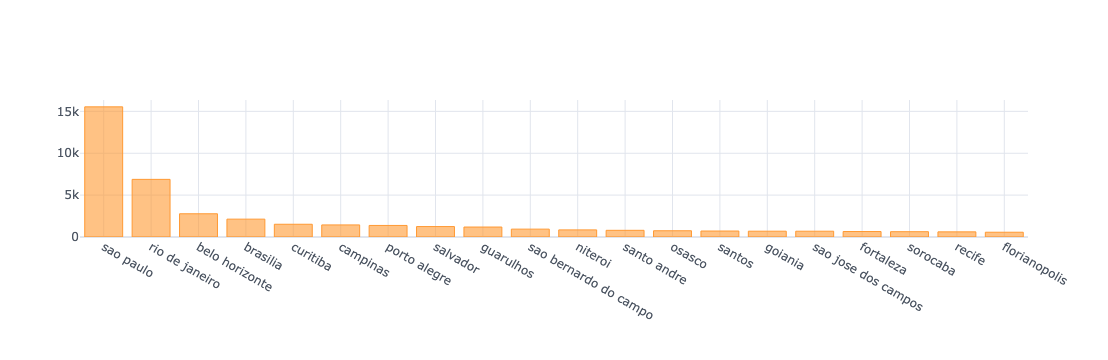

In [16]:
customers_location_top20.iplot(kind='bar', theme='white')

In [17]:
customers_location_top20

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
niteroi                    849
santo andre                797
osasco                     746
santos                     713
goiania                    692
sao jose dos campos        691
fortaleza                  654
sorocaba                   633
recife                     613
florianopolis              570
Name: customer_id, dtype: int64

In [18]:
top20_customer_locations = customers_location_top20.index

In [19]:
for index, location in enumerate(list(top20_customer_locations)):
    print ("TOP", index + 1, ":", location)

TOP 1 : sao paulo
TOP 2 : rio de janeiro
TOP 3 : belo horizonte
TOP 4 : brasilia
TOP 5 : curitiba
TOP 6 : campinas
TOP 7 : porto alegre
TOP 8 : salvador
TOP 9 : guarulhos
TOP 10 : sao bernardo do campo
TOP 11 : niteroi
TOP 12 : santo andre
TOP 13 : osasco
TOP 14 : santos
TOP 15 : goiania
TOP 16 : sao jose dos campos
TOP 17 : fortaleza
TOP 18 : sorocaba
TOP 19 : recife
TOP 20 : florianopolis


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">고객 분석3: 고객은 주로 어떤 지불방법을 사용할까?</font><br>
</div>

In [20]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 없는 데이터 확인하기
- isnull().sum() 사용

In [21]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### unique 한 값 확인하기
- unique() 사용

In [22]:
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

#### 특정 값을 가진 행 삭제하기

In [23]:
payments = payments[payments['payment_type'] != 'not_defined']

In [24]:
payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [25]:
payment_type_count = payments.groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)

In [30]:
payment_type_count

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

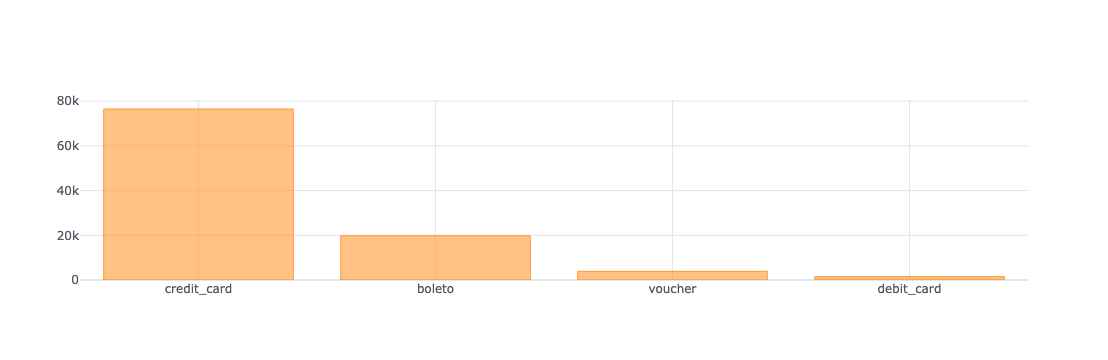

In [26]:
payment_type_count.iplot(kind='bar', theme='white')

- 참고: https://plotly.com/python/pie-charts/

In [27]:
payment_type_count

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

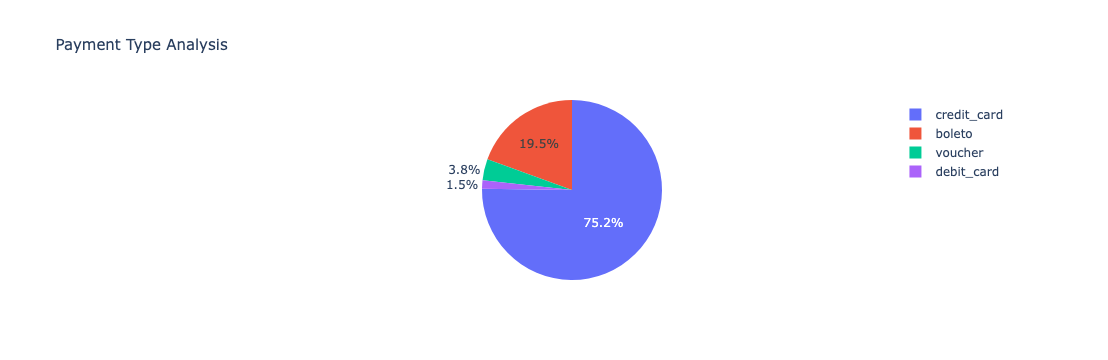

In [28]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Pie(    
        labels=payment_type_count.index, values=payment_type_count.values
    )
)

fig.update_layout(
    {
        "title": {
            "text": "Payment Type Analysis",
            "font": {
                "size": 15
            }
        },
        "showlegend": True
    }
)

fig.show()

### 그래프 세부 조정
- 각 필드 확인: https://plotly.com/python/reference/

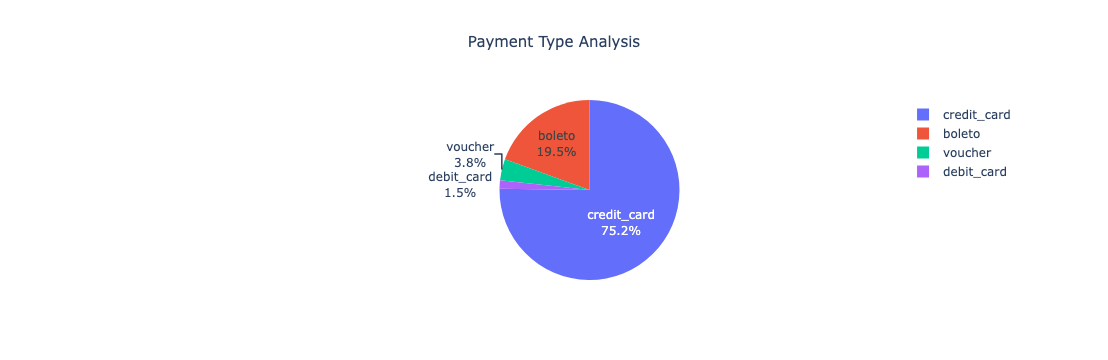

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Pie(    
        labels=payment_type_count.index, values=payment_type_count.values,
        textinfo='label+percent', insidetextorientation='horizontal'
    )
)

fig.update_layout(
    {
        "title": {
            "text": "Payment Type Analysis",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "showlegend": True
    }
)

fig.show()

<div class="alert alert-block" style="border: 2px solid #1976D2;background-color:#E3F2FD;padding:5px;font-size:0.9em;">
본 자료는 저작권법 제25조 2항에 의해 보호를 받습니다. 본 자료를 외부에 공개하지 말아주세요.<br>
본 강의만 잘 정리하면, 데이터 분석과 데이터 과학(머신러닝, 인공지능) 모두 가능합니다!<br>
<b><a href="https://school.fun-coding.org/">잔재미코딩</a> 에서 본 강의 기반 최적화된 로드맵도 확인하실 수 있습니다</b></div>